In [1]:
# logistic回归
# 实现二分类

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 生成分类数据
# 分类0
d1 = torch.normal(-1,1,size=(100,1))
d2 = torch.normal(-2,1,size=(100,1))
x0 = torch.cat((d1,d2), dim=1)
y0 = torch.zeros((100,))

# 分类1
d1 = torch.normal(1,1,size=(100,1))
d2 = torch.normal(2,1,size=(100,1))
x1 = torch.cat((d1,d2), dim=1)
y1 = torch.ones((100,))

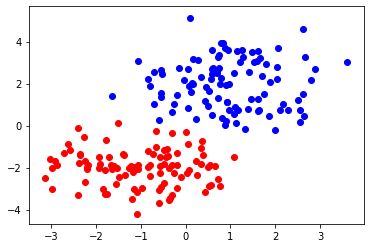

In [4]:
plt.scatter(x0[:,0], x0[:,1], c='r')
plt.scatter(x1[:,0], x1[:,1], c='b')
plt.show()

In [5]:
# 合并两个分类的数据组成训练集
train_x = torch.cat((x0,x1), dim=0)
train_y = torch.cat((y0,y1), dim=0)

In [6]:
import torch.nn as nn

In [7]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features = nn.Linear(2,1) # 线性层
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.features(x)
        x = self.sigmoid(x)
        return x

In [8]:
_loss = 1000
lr_net = LR()
loss_fn = nn.BCELoss()
lr = 0.01
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)
for i in range(1000):
    y_pred = lr_net(train_x)
    loss = loss_fn(y_pred.squeeze(), train_y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if abs(_loss-loss)<0.001:
        break
    _loss = loss
    correct = (y_pred.squeeze().ge(0.5).float() == train_y).sum()
print("i:", i)
print("correct:", correct.item())
    
i,lr_net.features.weight, lr_net.features.bias

i: 50
correct: 199


(50, Parameter containing:
 tensor([[0.7939, 1.3964]], requires_grad=True), Parameter containing:
 tensor([-0.2837], requires_grad=True))

In [9]:
# 生成分界线数据
# (w0*x0 + w1*x1 +b) = 0
# x1 = -(b + w0*x0)/w1
lx = torch.linspace(-6,6,121)
ly = -(lr_net.features.bias+lr_net.features.weight[0][0]*lx)/lr_net.features.weight[0][1]

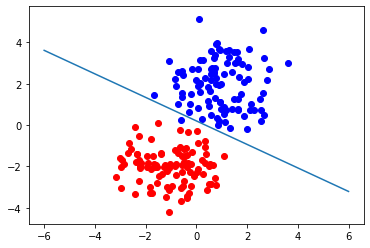

In [10]:
plt.plot(lx, ly.detach())
plt.scatter(x0[:,0], x0[:,1], c='r')
plt.scatter(x1[:,0], x1[:,1], c='b')
plt.show()